In [6]:
# setup
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')

In [52]:
import os
from osgeo import gdal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir("/home/maciej/proj/ead/data/")
files=[f for f in os.listdir(".") if f.endswith('.tif')] #1
files.sort()
files
len(files)

['administracja.tif',
 'centrahanl.tif',
 'kultura.tif',
 'lot.tif',
 'paliwa.tif',
 'pkp.tif',
 'pks.tif',
 'policja.tif',
 'przedszkola.tif',
 'przychodnie.tif',
 'restauracje.tif',
 'rozrywka.tif',
 'sportowe.tif',
 'szkola.tif',
 'szpitale.tif',
 'uczelnie.tif']

16

In [48]:
def rasterToDataFrame(*files):
    dct = {}
    colnames=[os.path.splitext(file)[0] for file in files]
    for file,colname in zip(files, colnames):
        raster = gdal.Open(file)
        dct[colname] = raster.GetRasterBand(1).ReadAsArray().flatten()
    
    df = pd.DataFrame(dct)
    
    for file,colname in zip(files, colnames):
        raster = gdal.Open(file)
        band = raster.GetRasterBand(1)
        if band.DataType == gdal.GDT_Byte:
            df[colname] = df[colname].astype('category')
        nodata = band.GetNoDataValue()
        if nodata and nodata == nodata: # test czy jest to liczba
            df[colname] = df[colname].replace(nodata,np.NaN)

    return df

data = rasterToDataFrame(*files)
data.info()
data.sample(10)
data.shape
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381140 entries, 0 to 381139
Data columns (total 16 columns):
administracja    215978 non-null float64
centrahanl       215978 non-null float64
kultura          215978 non-null float64
lot              215978 non-null float64
paliwa           215978 non-null float64
pkp              215978 non-null float64
pks              215978 non-null float64
policja          215978 non-null float64
przedszkola      215978 non-null float64
przychodnie      215978 non-null float64
restauracje      215978 non-null float64
rozrywka         215978 non-null float64
sportowe         215978 non-null float64
szkola           215978 non-null float64
szpitale         215978 non-null float64
uczelnie         215978 non-null float64
dtypes: float64(16)
memory usage: 46.5 MB


,administracja,centrahanl,kultura,lot,paliwa,pkp,pks,policja,przedszkola,przychodnie,restauracje,rozrywka,sportowe,szkola,szpitale,uczelnie
53789,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314117,9.177818,7.896471,36.801422,37.473734,8.052803,10.098830,31.296130,9.541212,10.245767,8.491483,1.127266,5.515104,5.702126,9.144444,16.400509,32.754955
35014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110233,12.115237,11.986354,31.304023,42.023556,10.101561,12.012161,25.463523,11.857010,7.096600,10.569827,12.516371,7.201196,11.174394,11.197334,28.434543,27.624597
334107,18.856945,9.136563,46.480549,47.140565,17.731930,8.363622,40.975257,19.220340,2.659966,9.905835,10.545957,15.028922,7.114654,3.021388,22.734425,42.434082
208081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193771,14.443691,17.316710,41.863785,50.083053,18.938358,18.195560,33.417838,18.823881,17.078899,16.659512,14.739285,9.759304,14.228185,14.311600,37.859200,36.258273
227799,12.067426,10.887541,18.919102,29.582460,11.170008,11.771802,13.574550,11.434624,6.085754,8.000136,6.130586,5.929127,7.440776,7.482393,11.361474,16.019799
144507,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
249566,6.834402,5.159217,18.441262,18.684803,6.521481,8.507137,12.935970,6.953397,4.035601,7.052273,4.482726,1.859010,6.970832,2.727890,12.456849,14.394795


(381140, 16)

,administracja,centrahanl,kultura,lot,paliwa,pkp,pks,policja,przedszkola,przychodnie,restauracje,rozrywka,sportowe,szkola,szpitale,uczelnie
count,215978.000000,215978.000000,215978.000000,215978.000000,215978.000000,215978.000000,215978.000000,215978.000000,215978.000000,215978.000000,215978.000000,215978.000000,215978.000000,215978.000000,215978.000000,215978.000000
mean,9.569529,7.428340,27.706194,32.775559,8.358203,9.654232,22.351951,10.089591,7.022730,7.594927,6.441902,6.205849,8.790354,6.160819,19.269996,21.923476
std,5.354346,4.785151,11.993405,14.254566,5.053814,5.431268,11.102536,5.392667,4.627110,4.771496,4.231955,4.014150,4.845255,3.644914,11.695562,11.698736
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,5.973484,3.836266,20.313493,23.465712,4.715188,5.836898,14.600621,6.354267,3.593937,4.116049,3.341752,3.421404,5.451107,3.624198,10.570446,13.491679
50%,9.229170,6.914068,28.847295,33.789793,8.029737,9.164853,23.033828,9.820970,6.534349,7.216679,5.982897,5.624895,8.579656,5.947405,18.096089,22.340028
75%,12.915872,10.533178,36.454046,43.323763,11.544426,13.101247,30.528542,13.683589,9.883259,10.613142,9.001867,8.413758,12.024234,8.455435,26.947316,30.962273
max,32.388687,30.408142,60.096724,70.816258,32.235690,37.391714,55.411879,33.269391,30.496978,30.067889,26.626819,26.841719,32.622325,24.538770,57.227245,56.348798


TypeError: unsupported operand type(s) for +: 'AxesSubplot' and 'AxesSubplot'

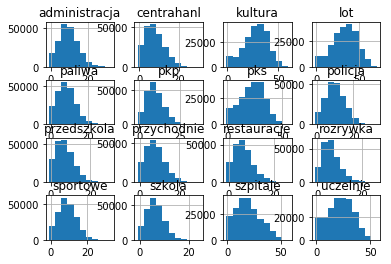

In [64]:
drv = ogr.GetDriverByName("ESRI Shapefile")
vector = drv.Open(shapefile,0)
layer = vector.GetLayer()
lista=[]



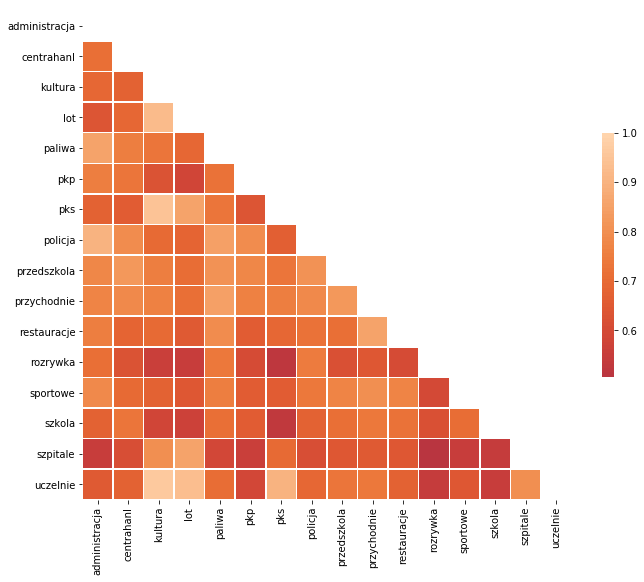

In [61]:
corr = data.corr(method='pearson')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [62]:
skew = data.skew()
print(skew)

administracja    0.352242
centrahanl       0.508374
kultura         -0.445335
lot             -0.349777
paliwa           0.463064
pkp              0.380678
pks             -0.172531
policja          0.195968
przedszkola      0.620677
przychodnie      0.477646
restauracje      0.616624
rozrywka         0.791362
sportowe         0.200642
szkola           0.430081
szpitale         0.369051
uczelnie        -0.100936
dtype: float64


In [17]:
def checkColorTable(*files):
    dct = {}
    for file in files:
        raster = gdal.Open(file)
        band = raster.GetRasterBand(1)
        dct[file] = band.GetRasterColorTable()
    return dct


In [19]:
checkColorTable(*files)

{'administracja.tif': None,
 'centrahanl.tif': None,
 'kultura.tif': None,
 'lot.tif': None,
 'paliwa.tif': None,
 'pkp.tif': None,
 'pks.tif': None,
 'policja.tif': None,
 'przedszkola.tif': None,
 'przychodnie.tif': None,
 'restauracje.tif': None,
 'rozrywka.tif': None,
 'sportowe.tif': None,
 'szkola.tif': None,
 'szpitale.tif': None,
 'uczelnie.tif': None}

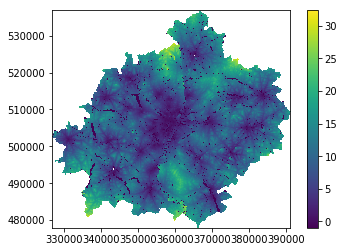

In [26]:
raster = gdal.Open('administracja.tif')
band = raster.GetRasterBand(1)
arr = band.ReadAsArray()
gt=raster.GetGeoTransform()

east,south = gdal.ApplyGeoTransform(gt,raster.RasterXSize,raster.RasterYSize) # prawy dolny
west,north = gdal.ApplyGeoTransform(gt,0,0) #lewy górny

plt.imshow(arr,cmap='viridis',extent=[west,east,south,north])
plt.colorbar()
plt.show()

(array([320000., 340000., 360000., 380000., 400000.]),
 <a list of 0 Text xticklabel objects>)

(array([320000., 340000., 360000., 380000., 400000.]),
 <a list of 0 Text xticklabel objects>)

(array([320000., 340000., 360000., 380000., 400000.]),
 <a list of 0 Text xticklabel objects>)

(array([320000., 340000., 360000., 380000., 400000.]),
 <a list of 0 Text xticklabel objects>)

(array([320000., 340000., 360000., 380000., 400000.]),
 <a list of 0 Text xticklabel objects>)

(array([320000., 340000., 360000., 380000., 400000.]),
 <a list of 0 Text xticklabel objects>)

(array([320000., 340000., 360000., 380000., 400000.]),
 <a list of 0 Text xticklabel objects>)

(array([320000., 340000., 360000., 380000., 400000.]),
 <a list of 0 Text xticklabel objects>)

(array([320000., 340000., 360000., 380000., 400000.]),
 <a list of 0 Text xticklabel objects>)

(array([320000., 340000., 360000., 380000., 400000.]),
 <a list of 0 Text xticklabel objects>)

(array([320000., 340000., 360000., 380000., 400000.]),
 <a list of 0 Text xticklabel objects>)

(array([320000., 340000., 360000., 380000., 400000.]),
 <a list of 0 Text xticklabel objects>)

(array([320000., 340000., 360000., 380000., 400000.]),
 <a list of 5 Text xticklabel objects>)

(array([320000., 340000., 360000., 380000., 400000.]),
 <a list of 5 Text xticklabel objects>)

(array([320000., 340000., 360000., 380000., 400000.]),
 <a list of 5 Text xticklabel objects>)

(array([320000., 340000., 360000., 380000., 400000.]),
 <a list of 5 Text xticklabel objects>)

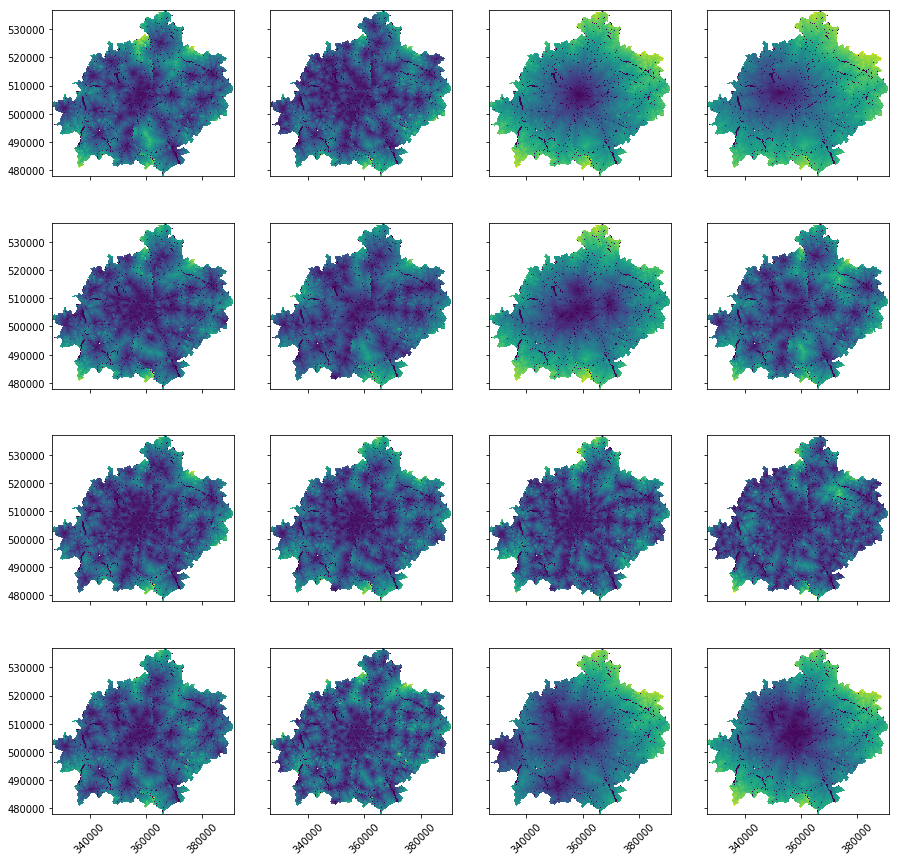

In [44]:
def plotRaster(file,ax=None,cmap=None):
    '''
    docstring
    '''
    ax = ax or plt.gca() # pobranie aktywnego axes
    rast = gdal.Open(file)
    if not rast:
        print("data not found or not raster data")
        return None

    gt = rast.GetGeoTransform()

    east,south = gdal.ApplyGeoTransform(gt,rast.RasterXSize,rast.RasterYSize) # prawy dolny
    west,north = gdal.ApplyGeoTransform(gt,0,0) #lewy górny
    extent = [west,east,south,north]

    band = rast.GetRasterBand(1)
    arr = band.ReadAsArray()
    ct = band.GetRasterColorTable()

    ax.imshow(arr,cmap='viridis',extent = extent)
    
fig, axes = plt.subplots(4, 4, sharex='all', sharey='all',figsize=(15,15))
for ax,file in zip(axes.flat[0:len(files)],files):
    plotRaster(file,ax)
    
for ax in fig.axes:
    plt.sca(ax) # atywowanie axes
    plt.xticks(rotation=45)

